In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading both train and test dataset
train=pd.read_csv('train_BigMartSales.csv')
test=pd.read_csv('test_BigMartSales.csv')

In [3]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Target Variable: Item_Outlet_Sales
    
- Train dataset have 12 columns and 8523 entries.

- Data Types: float64(4), int64(1), object(7)
    
- Missing values are present in Item_Weight,Outlet_Size

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


- Target Variable: Item_Outlet_Sales
    
- Test dataset have 11 columns and 5681 entries.

- Data Types: float64(3), int64(1), object(7)
    
- Missing values are present in Item_Weight,Outlet_Size

In [8]:
#Checking for null values
train.isnull().sum()[train.isnull().sum()!=0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [9]:
test.isnull().sum()[test.isnull().sum()!=0]

Item_Weight     976
Outlet_Size    1606
dtype: int64

In [10]:
#5 point summary
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDG33,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060,NaN,NaN,NaN,12.8576,4.64346,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523,NaN,NaN,NaN,0.066132,0.0515978,0,0.0269895,0.0539309,0.0945853,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523,NaN,NaN,NaN,140.993,62.2751,31.29,93.8265,143.013,185.644,266.888
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523,NaN,NaN,NaN,1997.83,8.37176,1985,1987,1999,2004,2009
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inference:

- Values are shown only for numerical columns and include='all' will include object data.

- Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales have data that is skewed.

- Including Object data type will help us know how many unique values are present

In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


Inference:
    
- Values in the above column show that there are outliers and skewness present.

- Item_Weight is having spread on left and right side of the data.

- Item_Visibility is having right skewness.

- Item_MRP is having spread on both side of data.

In [12]:
#combining both datasets

combined=pd.concat([train,test],sort=False,ignore_index=True)

In [13]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


- After combining we see maximum NA values in Item_Outlet_Sales because target attribute is missing in test dataset.

In [14]:
combined.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [15]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

# Data Visualization- UniVariate Analysis:

- For Numerical data we use Histogram/Distplot,but it cannot be plotted with null values

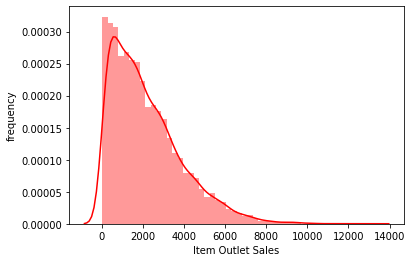

In [16]:
#Target Variable

sns.distplot(train['Item_Outlet_Sales'],color='red')
plt.xlabel('Item Outlet Sales')
plt.ylabel('frequency')
plt.show()



- Diagram shows that data is right skewed.

- We dont check for combined dataset as there are missing values present.

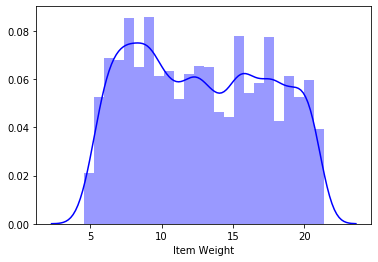

In [17]:
#Item_Weight- this variable have null values so we will drop the null values and then plot the graph

sns.distplot(combined['Item_Weight'].dropna(),color='blue')
plt.xlabel('Item Weight')
plt.show()

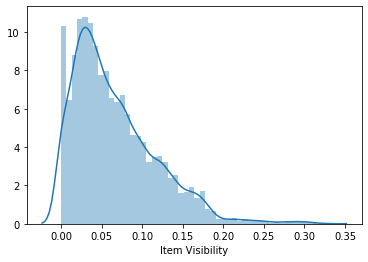

In [18]:
#Item Visibility

sns.distplot(combined['Item_Visibility'])
plt.xlabel('Item Visibility')
plt.show()


- Right skewness is present in the data for Item Visibility attribute and it shows 0 visibility which is not possible and we will look at this in further steps

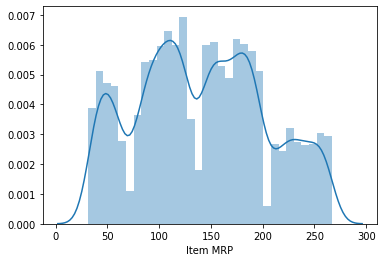

In [19]:
#Item_MRP

sns.distplot(combined['Item_MRP'])
plt.xlabel('Item MRP')
plt.show()

#This tells us that there are many different values with high frequency and therefore we see this kind of spread in the graph.

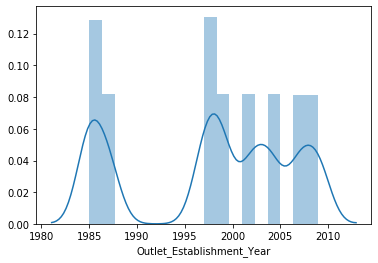

In [20]:
#Outlet_Establishment_Year

sns.distplot(combined['Outlet_Establishment_Year'])
plt.xlabel('Outlet_Establishment_Year')
plt.show()


- This graph shows that first mart was opened in year 1985 and later on there were many BigSalesMart opened between the year 196-2010.

- The drop shows that there were no opening/new mart in the initial year after the first mart was opened and even later they was gap between the opening of new marts.

# Univariate Analysis- Categorical Variable

- We use value_count function to get the count of the items present in categorical variable

- Barplot is used for plotting categorical variable

In [21]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- From the values we get that,the same content is written in different ways i.e Low Fat/LF/low fat & Regular/reg

- Therefore we use replace function and reduce the items and add them to their respective and correct column

In [22]:
train['Item_Fat_Content'].replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

In [23]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [25]:
test['Item_Fat_Content'].replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

In [26]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [27]:
combined['Item_Fat_Content'].replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

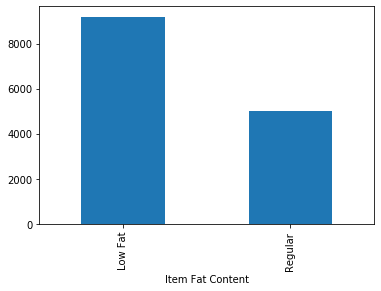

In [28]:
combined['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.xlabel('Item Fat Content')
plt.show()

#Graph shows that frequency of low fat items is more than Regular items

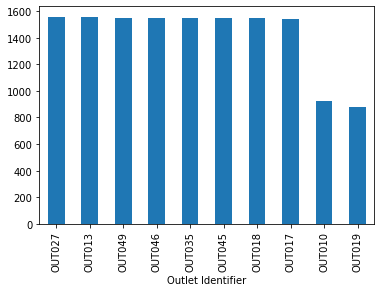

In [29]:
#Outlet_Identifier

combined['Outlet_Identifier'].value_counts().plot(kind='bar')
plt.xlabel('Outlet Identifier')
plt.show()


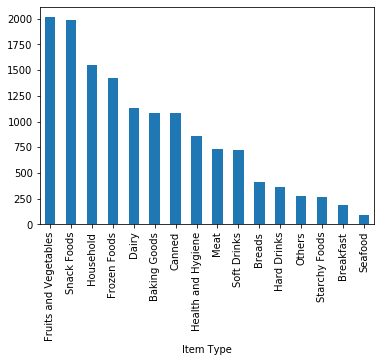

In [30]:
#Item Type

combined['Item_Type'].value_counts().plot(kind='bar')
plt.xlabel('Item Type')
plt.show()

#Fruits,vegetables and snack foods are in higher quantity whereas stock of seafood is less.

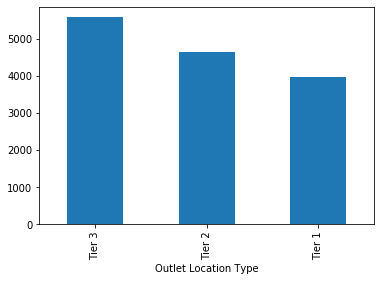

In [31]:
#Outlet Location Type

combined['Outlet_Location_Type'].value_counts().plot(kind='bar')
plt.xlabel('Outlet Location Type')
plt.show()

#Tier3 have higher frequency in the outlet location type

# Bivariate Analysis: Numerical vs Numerical

- For bivariate analysis: num vs num data we use SCATTER PLOT and it can be plotted with missing values present in it.

In [32]:
#correlation

combined.corr()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


- Item MRP is highly correlated with target attribute.

- Item Visibility,Outlet_Establishment_year are negatively correlated with target variable

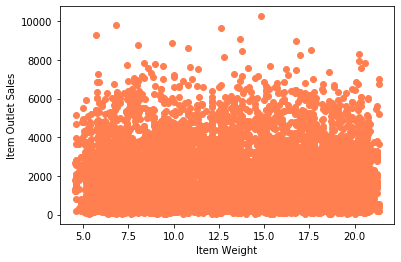

In [33]:
#Target vs Predictor(Item_weight)

plt.scatter(combined['Item_Weight'],combined['Item_Outlet_Sales'],color='coral')
plt.xlabel('Item Weight')
plt.ylabel('Item Outlet Sales')
plt.show()

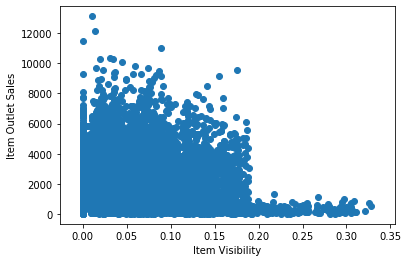

In [34]:
#Target vs Predictor(Item_weight)

plt.scatter(combined['Item_Visibility'],combined['Item_Outlet_Sales'])
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.show()

- As seen in correlation table Item_weight-Item_Outlet_Sales are negatively correlated and we see that in our graph.

- As Item Visibility increases Item Outlet Sales decreases, we can assume that Highly visible items can be washing machine/oven or things like that which does not have sales on daily bases.

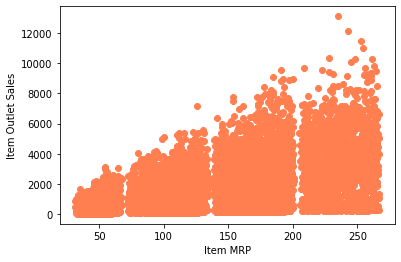

In [35]:
#Target vs Predictor(Item_MRP)

plt.scatter(combined['Item_MRP'],combined['Item_Outlet_Sales'],color='coral')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

- There is high correlation between Item_MRP and target attribute.

- In the graph we observe that as MRP increases Item sales also increases,this shows that sales of items with higher MRP is more.

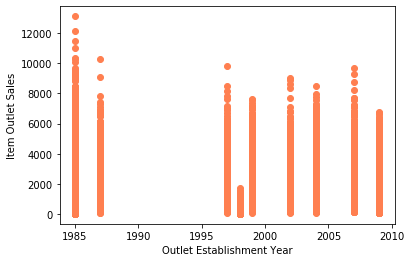

In [36]:
#Target vs Predictor(Outlet_Establishment_year)

plt.scatter(combined['Outlet_Establishment_Year'],combined['Item_Outlet_Sales'],color='coral')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.show()

- As observed in the univariate analysis there was major gap between the new openings of Big Sales Mart and the same we observe in the above graph.

- Also there was higher sales in the initial year when the mart was started,but there is a downfall seen in the later years when new marts were opened. 

- We can try and find the reason behind the downfall in the sales of the new marts.

# Bivariate Analysis: Numerical vs Categorical

- We use boxplot for plotting num vs cat data.

- In boxplot we have IQR(Inter Quartile Range)= Q3-Q1

    where Q1=25%, Q2=50%(Median), Q3=75%
    
    Lower Boundary= Q1 - 1.5 * IQR
    
    Upper Boundary= Q3 + 1.5 * IQR
    
     
- It helps us analyse if there are outlier present in the data

In [37]:
combined.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

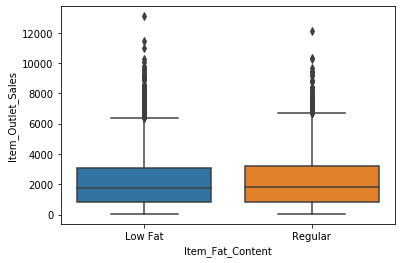

In [38]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=combined)
plt.show()

#Graph shows there are outlier present for both Low Fat and Regular item w.r.t Item Outlet Sales

In [39]:
combined.groupby('Item_Fat_Content')['Item_Outlet_Sales'].describe().T

Item_Fat_Content,Low Fat,Regular
count,5517.000000,3006.000000
mean,2157.711534,2224.561170
std,1697.973824,1721.480865
min,33.290000,33.955800
25%,826.257800,857.550400
50%,1765.035800,1844.598900
75%,3050.695600,3198.669650
max,13086.964800,12117.560000


- There is difference between mean and median value, as mean is higher than median we can say that there are outliers are present in the data.

- Also the difference between (max-75%) is high for both column so we can predict there are outliers present.

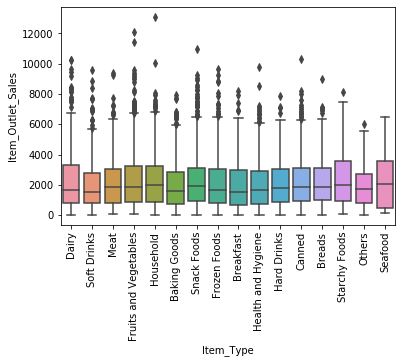

In [40]:
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=combined)
plt.xticks(rotation=90)
plt.show()

#Outliers are present for almost all items excluding seafood
#Higher outliers are present for fruits and vegetables,household,snack foods.

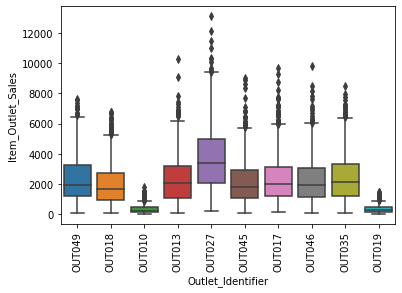

In [41]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=combined)
plt.xticks(rotation=90)
plt.show()

#Graph shows that OUT27,OUT13,OUT49 have higher sales as compared to others.
#OUT10,OUT19 can be considered as lowest w.r.t sales

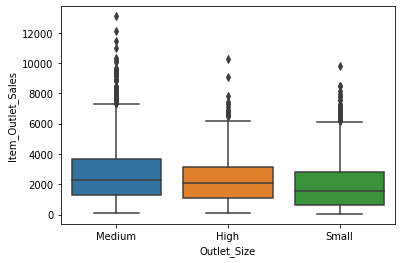

In [42]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=combined)
plt.show()

#Amongst all the outliers size,Medium size marts have more sales

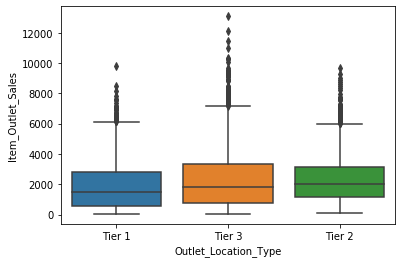

In [43]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=combined)
plt.show()

#Tier3 location type have more sales compared to other two location type

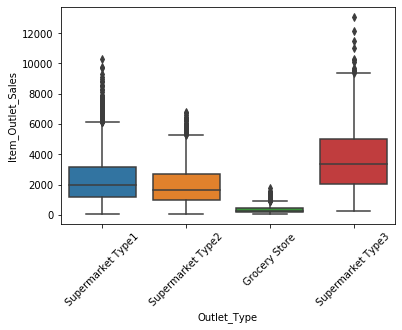

In [44]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=combined)
plt.xticks(rotation=45)
plt.show()

#Supermarket type3 have higher sales followed by supermarket type1

In [45]:
(combined.groupby(['Outlet_Size','Outlet_Location_Type','Outlet_Type'])['Outlet_Identifier'].value_counts())

Outlet_Size  Outlet_Location_Type  Outlet_Type        Outlet_Identifier
High         Tier 3                Supermarket Type1  OUT013               1553
Medium       Tier 1                Supermarket Type1  OUT049               1550
             Tier 3                Supermarket Type2  OUT018               1546
                                   Supermarket Type3  OUT027               1559
Small        Tier 1                Grocery Store      OUT019                880
                                   Supermarket Type1  OUT046               1550
             Tier 2                Supermarket Type1  OUT035               1550
Name: Outlet_Identifier, dtype: int64

Inference:
    
- As observed in the above visualization and after using groupby function we get that OUT27 with higher sales,is of Medium Outlet Size located in Tier3 with Outlet Type as Supermarket Type3.

- With visualization method we could analyze and understand the data in more better way.

- Therefore Data Visualization is an important part of any Data Analysis.

# Missing Data Treatment:

- Missing values row can sometime contain important information that can be necessary for further predictions and hence it is not always appropriate option to drop the missing values row.

- There are different methods to deal with missing values:
    
    - Delete the rows
    
    - Mean/Median/Mode Imputation

In [46]:
combined.isna().sum()[combined.isna().sum()!=0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le_item_identifier=le.fit_transform(combined['Item_Identifier'])

In [48]:
le_item_identifier

array([ 156,    8,  662, ..., 1426,  521,  997])

In [49]:
combined['Item_Weight'].fillna(le_item_identifier.mean(),inplace=True)

In [50]:
combined['Outlet_Size'].fillna('Small',inplace=True)

In [51]:
combined.isna().sum()[combined.isna().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

- Values for both attributes containing NA is imputed.

- Will not impute NA values for Target variable.

- As observed in Item Visibility column,there was 0 value present in it and that is impossible because there can be no item with 0 visibility

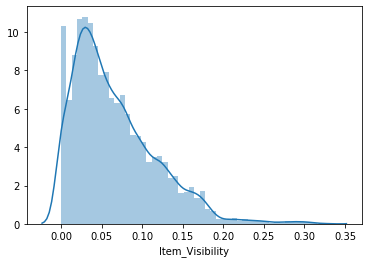

In [52]:
sns.distplot(combined['Item_Visibility'])
plt.show()

In [53]:
combined['Item_Visibility'].replace(to_replace=0.00,value=combined['Item_Visibility'].mean(),inplace=True)

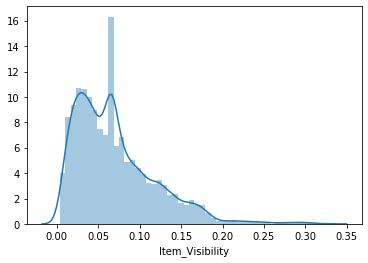

In [54]:
sns.distplot(combined['Item_Visibility'])
plt.show()

# Feature Engineering

- Most of the times, the given features in a dataset are not sufficient to give satisfactory predictions. In such cases, we have to create new features which might help in improving the model’s performance. Let’s try to create some new features for our dataset.


First we look at the Item_Type variable and classify the categories into Perishable and Non-Perishable and create a new feature.

In [55]:
combined['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [56]:
perishable=['Meat', 'Fruits and Vegetables','Dairy','Breakfast','Seafood','Breads']

non_perishable=['Soft Drinks','Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods','Health and Hygiene', 'Hard Drinks', 'Canned']

In [57]:
item_list =[] 

for i in combined['Item_Type']:
    if i in perishable:
        item_list.append('perishable')
    elif (i in non_perishable):
        item_list.append('non_perishable')
    else:
        item_list.append('others')
        
combined['Item_Type_new'] = item_list

In [58]:
ids=[]

for i in combined.Item_Identifier:
    ids.append(i[:2])
    
combined['Id_Category']=pd.Series(ids)

In [59]:
pd.DataFrame(combined.groupby('Id_Category')['Item_Type'].value_counts())

Item_Type
Id_Category Item_Type                       
DR          Soft Drinks                  726
            Hard Drinks                  362
            Dairy                        229
FD          Fruits and Vegetables       2013
            Snack Foods                 1989
            Frozen Foods                1426
            Baking Goods                1086
            Canned                      1084
            Dairy                        907
            Meat                         736
            Breads                       416
            Starchy Foods                269
            Breakfast                    186
            Seafood                       89
NC          Household                   1548
            Health and Hygiene           858
            Others                       280

In [60]:
#change regular category where there is NC in 'item_cat' to 'Non Edible'
combined.loc[combined.Id_Category=='NC','Item_Fat_Content']='Non Edible'

combined.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

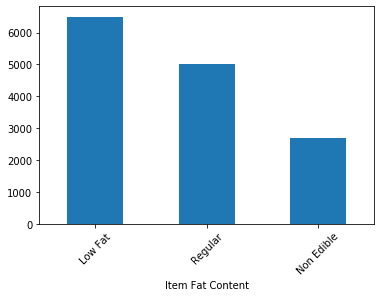

In [61]:
combined.Item_Fat_Content.value_counts().plot(kind='bar')
plt.xlabel('Item Fat Content')
plt.xticks(rotation=45)
plt.show()

- Hence we have created a new feature in Item_Fat_Content i.e Non Edible.

- Also we have differentiated Item_Type into Perishable and Non-Perishable

In [62]:
combined['price_per_unit']=combined.Item_MRP/combined.Item_Weight

As seen in the Item_MRP vs Item_Outlet_Sales graph, we observed that Item_MRP was spread across in 4 chunks. 

So now we will assign a label to each of these chunks and use this label as a new variable.

In [66]:
def clusters(x):
    if x<69:
        return '1st'
    elif x in range(69,136):
        return '2nd'
    elif x in range(136,203):
        return '3rd'
    else:
        return '4th'
combined['Item_MRP_Clusters'] = combined['Item_MRP'].astype('int').apply(clusters)

In [67]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_new,Id_Category,price_per_unit,Item_MRP_Clusters
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,perishable,FD,26.861204,4th
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,non_perishable,DR,8.153581,1st
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,perishable,FD,8.092457,3rd
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,perishable,FD,9.484115,3rd
4,NCD19,8.93,Non Edible,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,non_perishable,NC,6.031512,1st


- We have created new features:

    - In Item Weight: Differentiated items into Perishable,Non-Perishable and others.
    
    - In Item_Fat_Content: We already had Low Fat,Regular, created new feature as Non-Edible.
        
    - New Feature as Price_per_unit.
    
    - Item_MRP is divided into 4 chunks.

In [68]:
combined.skew()

Item_Weight                  1.740312
Item_Visibility              1.320683
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.177531
price_per_unit               1.086188
dtype: float64

As seen in the above cell we dont get skewness for categorical variable and we cannot delete these attributes because this will cause data loss,also it will be difficult for further predictions.Therefore we Encode the categorical variable. 

# Encoding Categorical Variables:

Two techniques One Hot Encoding and Label Encoding will be used.

1. Label Encoding:
It means converting each category of a variable to a number. It is more suitable for ordinal variables — categorical variables with some order.

2. One Hot Encoding:
In this each category of a categorical variable is converted into a new binary column (1/0).

In [69]:
#We will label encode Outlet_Size,Outlet_Location_Type,Item_Fat_Content and Item_MRP_Clusters as these are ordinal variables.

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

combined['Outlet_Size']= le.fit_transform(combined['Outlet_Size'])
combined['Outlet_Location_Type'] = le.fit_transform(combined['Outlet_Location_Type'])
combined['Item_Fat_Content'] = le.fit_transform(combined['Item_Fat_Content'])
combined['Item_MRP_Clusters'] = le.fit_transform(combined['Item_MRP_Clusters'])

In [ ]:
#One Hot Encoding on the remaining categorical variable.

In [71]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_new', 'Id_Category',
       'price_per_unit', 'Item_MRP_Clusters'],
      dtype='object')

In [73]:
a = pd.get_dummies(combined[['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Id_Category']])
combined = combined.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Type','Item_Type_new','Id_Category'],axis = 1 )
combined = pd.concat([combined,a],axis = 1)

In [74]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Columns: 1605 entries, Item_Weight to Id_Category_NC
dtypes: float64(5), int32(4), int64(1), uint8(1595)
memory usage: 22.5 MB


As seen,all the attributes are converted into numerical variable.

# Data Preprocessing:

- Data Preprocessing steps involves data cleaning,data transformations and data scaling and other processes.

- As skewness is present in the data we will transform the data.

In [75]:
combined.skew()

Item_Weight                  1.740312
Item_Fat_Content             0.205470
Item_Visibility              1.320683
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
                               ...   
Item_Type_new_others         4.787227
Item_Type_new_perishable     0.761199
Id_Category_DR               2.808733
Id_Category_FD              -0.970026
Id_Category_NC               1.588047
Length: 1605, dtype: float64

- We need to skew the data for further predictive model and skewness process is used to bring the data closer to normal distribution.

- For Data Transformation there are different techniques that can be used:

    Log,Sqrt,exponential and many others.
    
We can also use boxcox method to transform the data.

- A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if our data isn’t normal, applying a Box-Cox means that we are able to run a broader number of tests.

In [76]:
l=[]
for i in combined.columns:
    if((combined[i].skew()<0.1) or (combined[i].skew()>0.2) and (i!='Item_Outlet_Sales')):
        l.append(i)
l

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'price_per_unit',
 'Item_MRP_Clusters',
 'Item_Identifier_DRA12',
 'Item_Identifier_DRA24',
 'Item_Identifier_DRA59',
 'Item_Identifier_DRB01',
 'Item_Identifier_DRB13',
 'Item_Identifier_DRB24',
 'Item_Identifier_DRB25',
 'Item_Identifier_DRB48',
 'Item_Identifier_DRC01',
 'Item_Identifier_DRC12',
 'Item_Identifier_DRC13',
 'Item_Identifier_DRC24',
 'Item_Identifier_DRC25',
 'Item_Identifier_DRC27',
 'Item_Identifier_DRC36',
 'Item_Identifier_DRC49',
 'Item_Identifier_DRD01',
 'Item_Identifier_DRD12',
 'Item_Identifier_DRD13',
 'Item_Identifier_DRD15',
 'Item_Identifier_DRD24',
 'Item_Identifier_DRD25',
 'Item_Identifier_DRD27',
 'Item_Identifier_DRD37',
 'Item_Identifier_DRD49',
 'Item_Identifier_DRD60',
 'Item_Identifier_DRE01',
 'Item_Identifier_DRE03',
 'Item_Identifier_DRE12',
 'Item_Identifier_DRE13',
 'Item_Identifier_DRE15',
 'Item_Identifier_DRE25',

In [80]:
import scipy.stats as st

for i in combined.columns:
    if i in l:
        combined[i]=list(st.boxcox(combined[i]+1)[0])
combined.skew()

C:\Users\Kajal Chopda\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\Kajal Chopda\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:107: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\Users\Kajal Chopda\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1984: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Kajal Chopda\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1985: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Item_Weight                  0.024036
Item_Fat_Content            -0.032999
Item_Visibility              0.013764
Item_MRP                     0.130728
Outlet_Establishment_Year    0.000000
                               ...   
Item_Type_new_others         4.787227
Item_Type_new_perishable     0.761199
Id_Category_DR               2.808733
Id_Category_FD              -0.970026
Id_Category_NC               1.588047
Length: 1605, dtype: float64